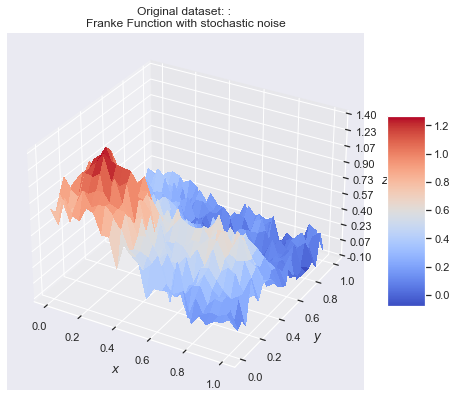

Performance with default values: t0, t1 = 5, 50
––––––––––––––––––––––––––––––––––––––––––––
OLS - MSE: 0.0715
OLS - R2: 0.1471
Ridge - MSE: 0.0715
Ridge - R2: 0.1471
––––––––––––––––––––––––––––––––––––––––––––
LEARNING RATE PERFORMANCE
OLS: Best learning rate η_0 = 4.00e-04 is given by t0 = 0.1 and t1 = 250
Ridge: Best learning rate η_0 = 4.00e-04 is given by t0 = 0.1 and t1 = 250


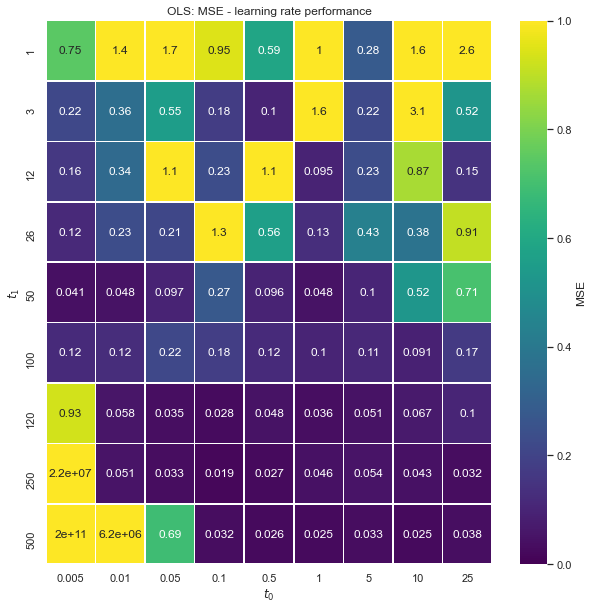

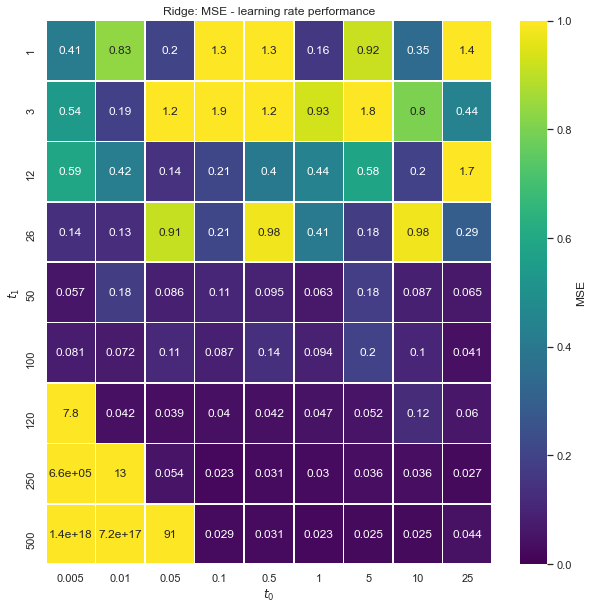

In [49]:
import numpy as np
from random import random, seed
from dataset import create_xyz_dataset, create_X, Plot_FrankeFunction
from regression import OLSRegression, RidgeRegression
import matplotlib.pyplot as plt


np.random.seed(1234)

# Degree of the polynomial
degree=5
# Datapoints (squared root of datapoints -> meshgrid)
n = 25
# Paramaters of noise distribution
mu_n = 0; sigma_n = 0.1

# Create vanilla dataset:
x,y,z = create_xyz_dataset(n,mu_n, sigma_n)
Plot_FrankeFunction(x,y,z, title="Original dataset: : \nFranke Function with stochastic noise")
# Convertion because of meshgrid
z = z.ravel(); n=n**2
X = create_X(x, y, degree)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches

# Default value
ols = OLSRegression(X,z)
ridge = RidgeRegression(X,z)
ols.split().rescale().fitSGD(n_epochs = n_epochs, m = m)
ridge.split().rescale().fitSGD(n_epochs = n_epochs, m = m)
print("Performance with default values: t0, t1 = 5, 50")
print("––––––––––––––––––––––––––––––––––––––––––––")
print("OLS - MSE:", ols.MSE_test())
print("OLS - R2:", ols.R2_test())
print("Ridge - MSE:", ols.MSE_test())
print("Ridge - R2:", ols.R2_test())
print("––––––––––––––––––––––––––––––––––––––––––––")

### LEARNING RATE
print("LEARNING RATE PERFORMANCE")

t0_vals = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 25]
t1_vals = [1, 3, 12, 26, 50, 100, 120, 250, 500]

mse_ols = np.zeros((len(t0_vals), len(t1_vals)))
mse_ridge = np.zeros((len(t0_vals), len(t1_vals)))

for i in range(len(t0_vals)):
    for j in range(len(t1_vals)):
        
        ols.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])
        ridge.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])
        
        mse_ols[i][j] = ols.MSE_test()
        mse_ridge[i][j] = ridge.MSE_test()
        
        """
        if mse_ols[i][j] > 1.:
            mse_ols[i][j] = 1.
            
        if mse_ridge[i][j] > 1.:
            mse_ridge[i][j] = 1.
        """

import seaborn as sns

sns.set()

def find_min_indexes(A):
    return np.array(np.where(A == A.min())).flatten()

ind= find_min_indexes(mse_ols)
eta0_ols=t0_vals[ind[1]]/t1_vals[ind[0]]
t0_ols=t0_vals[ind[1]]
t1_ols=t1_vals[ind[0]]
print("OLS: Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(eta0)+" is given by t0 = "+str(t0_ols)+" and t1 = "+str(t1_ols))
ind= find_min_indexes(mse_ridge)
eta0_ridge=t0_vals[ind[1]]/t1_vals[ind[0]]
t0_ridge=t0_vals[ind[1]]
t1_ridge=t1_vals[ind[0]]
print("Ridge: Best learning rate \N{greek small letter eta}_0 = {:.2e}".format(eta0)+" is given by t0 = "+str(t0_ridge)+" and t1 = "+str(t1_ridge))
    
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_ols, annot=True, ax=ax, cmap="viridis", xticklabels=t0_vals, cbar_kws={'label': 'MSE'}, yticklabels=t1_vals, vmin=0, vmax=1, linewidths=.5)
ax.set_title("OLS: MSE - learning rate performance")
ax.set_ylabel("$t_1$")
ax.set_xlabel("$t_0$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_ridge, annot=True, ax=ax, cmap="viridis", xticklabels=t0_vals, cbar_kws={'label': 'MSE'}, yticklabels=t1_vals, vmin=0, vmax=1, linewidths=.5)
ax.set_title("Ridge: MSE - learning rate performance")
ax.set_ylabel("$t_1$")
ax.set_xlabel("$t_0$")
plt.show()

N_EPOCHS PERFORMANCE


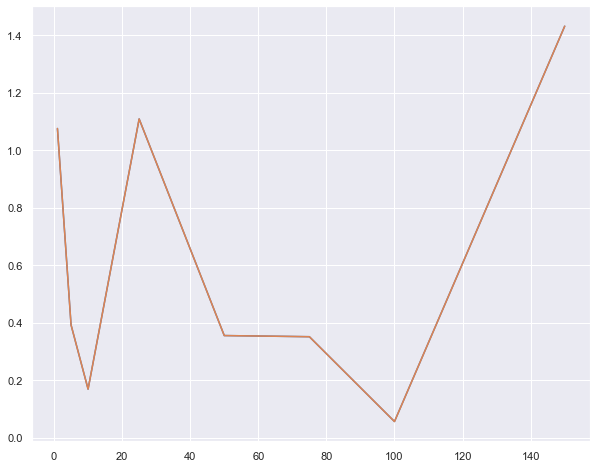

'def find_min_indexes(x):\n    return np.array(np.where(x == x.min()))[0]'

In [55]:
### N_MINIBATCHES
print("N_EPOCHS PERFORMANCE")

epochs_vals = [1, 5, 10, 25, 50, 75, 100, 150]

mse_ols = np.zeros((len(epochs_vals)))
mse_ridge = np.zeros((len(epochs_vals)))

for i in range(len(epochs_vals)):
        
    ols.fitSGD(i, m, t0_ols, t1_ols)
    ridge.fitSGD(i, m, t0_ridge, t1_ridge)

    mse_ols[i] = ols.MSE_test()
    mse_ridge[i] = ridge.MSE_test()

fig = plt.figure(figsize=(10,8))
plt.plot(epochs_vals,mse_ols)
plt.plot(epochs_vals,mse_ols)
plt.grid(True)
plt.show()

"""
if mse_ols[i][j] > 1.:
    mse_ols[i][j] = 1.

if mse_ridge[i][j] > 1.:
    mse_ridge[i][j] = 1.
"""

"""def find_min_indexes(x):
    return np.array(np.where(x == x.min()))[0]"""
